In [4]:
# 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

### 회귀분석의 목적

|설명모형|예측모형|
|---|---|
|전통적인 통계분야로서 데이터가 적은 모형|데이터마이닝 분야로서 데이터가 충분한 모형|
| ${\hat y} = \beta_1 X + \beta_0 $ 에서 $X$ 에 초점을 둠|  ${\hat y} = \beta_1 X + \beta_0 $ 에서 $\hat y$ 에 초점을 둠|
|종속(타깃,출력)변수와 독립(피처,예측)변수들간의 관계를 **설명**|새로운 사례에 대해 출력값을 **예측**<br>적합된 모형을 이용하여 알려지지 않은 데이터에 대한 **예측**|
|모집단에서 가정하는 가설적 관계에 대한 정보를 <br> 최대한 반영할 수 있도록 전체 데이터 집합 사용하여 최상의 적합모형 추정|학습용 데이터세트(모형 추정)와 평가용 데이터세트(모형 성능평가)로 나눔|

---

## LinearRegression을 이용한 주택 가격 예측

### 데이터셋 : House Sales in King County, USA

- 2014년 5월 ~ 2015년 5월까지 King County 주택가격
- kc_house_data.csv
- 출처: https://www.kaggle.com/harlfoxem/housesalesprediction

### 데이터 준비

In [6]:
house = pd.read_csv('kc_house_data.csv')
df = house.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 데이터 탐색 및 전처리

#### 데이터 전처리 함수

In [8]:
def data_preprocessing(df):
    df_new = df.copy()
    df_new['sold_year'] = df['date'].str[:4].astype('int64')
    df_new['sold_built_years'] = df_new.sold_year - df_new.yr_built
    df_new.drop(['id','date'], axis=1, inplace=True)
    return df_new

In [9]:
house_df = data_preprocessing(house)

In [10]:
df_corr_all = house_df.corr()

#### 변수별 히스토그램

#### 상관관계 히트맵

#### 주택가격과 상관관계

#### 주요 피처와 주택가격과의 관계(산점도, regplot)

In [11]:
df_corr_all['price'][df_corr_all['price'].sort_values(ascending=False) > 0.5].index[1:]

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

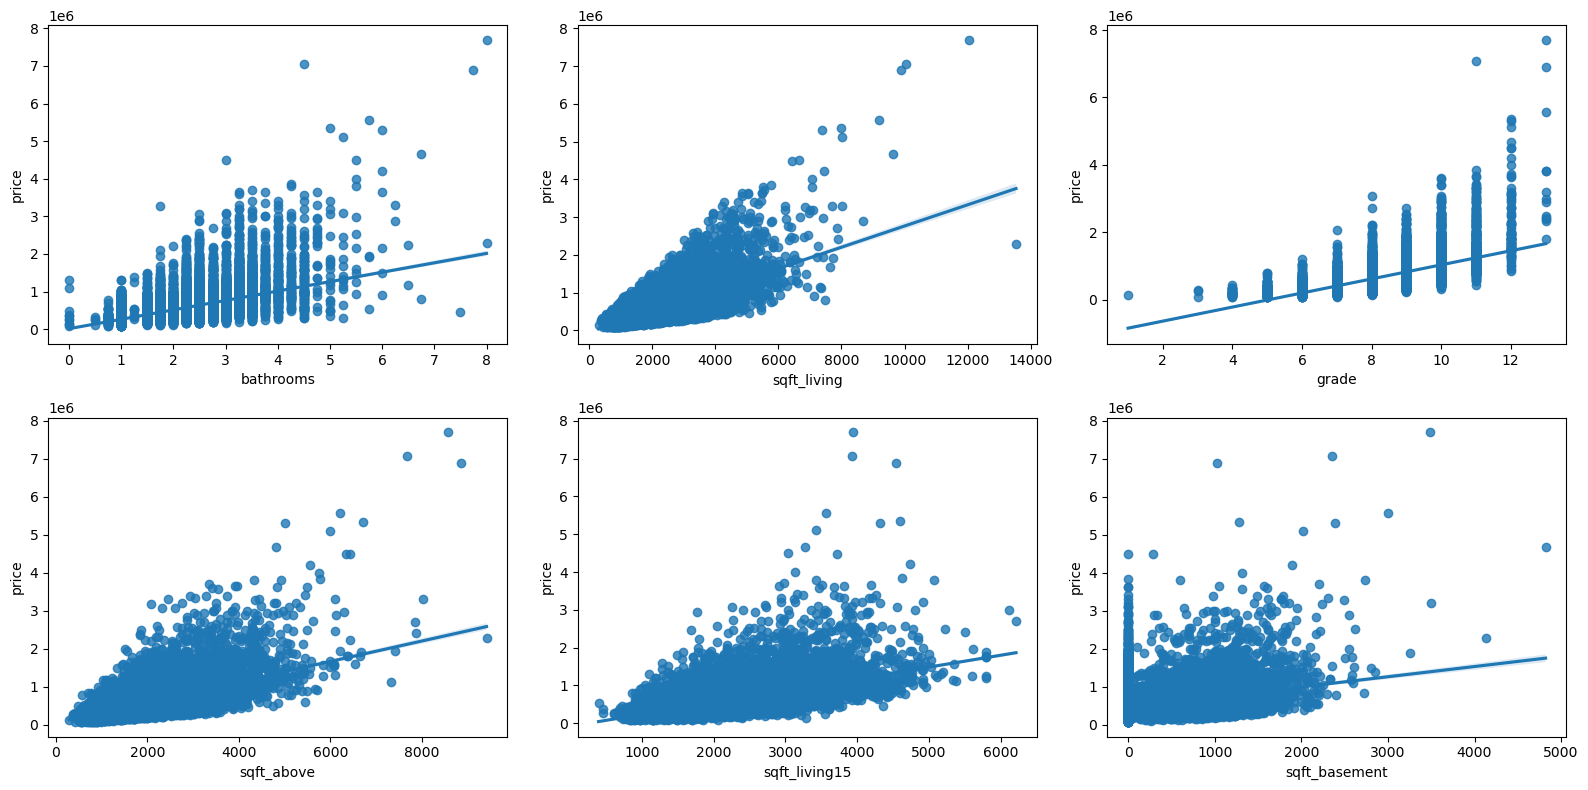

In [12]:
ftrnames = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_basement']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
for i, ftr in enumerate(ftrnames):
    row, col = i//3, i%3
    sns.regplot(data=house_df, x=ftr, y='price', ax=axs[row][col])
plt.tight_layout()
plt.show()

#### 주택가격 예측에 영향이 작은 변수 삭제 

- price와 상관관계가 매우 약한(corr<0.2) 변수들 

- 'sqft_living'과 상관관계가 강한 변수들
    
- 'sold-built_years'를 도출한 변수들
  

In [13]:
dfef_ftrs = ['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long',
       'sqft_lot15', 'sold_year','id','date']

In [14]:
df_corr_all['sqft_living'].sort_values(ascending=False).index

Index(['sqft_living', 'sqft_above', 'grade', 'sqft_living15', 'bathrooms',
       'price', 'bedrooms', 'sqft_basement', 'floors', 'yr_built', 'view',
       'long', 'sqft_lot15', 'sqft_lot', 'waterfront', 'yr_renovated', 'lat',
       'sold_year', 'condition', 'zipcode', 'sold_built_years'],
      dtype='object')

##### 데이터 변환 함수 수정

In [15]:
def data_preprocessing(df):
    df_new = df.copy()
    df_new['sold_year'] = df['date'].str[:4].astype('int64')
    df_new['sold_built_years'] = df_new.sold_year - df_new.yr_built
    del_ftrs = ['sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_living15',
                 'condition', 'yr_built', 'yr_renovated', 'sold_year',
                 'zipcode', 'long', 'lat','id','date']
    df_new.drop(del_ftrs, axis=1, inplace=True)
    return df_new

In [16]:
house_df = data_preprocessing(house)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,sold_built_years
0,221900.0,3,1.00,1180,1.0,0,0,7,0,59
1,538000.0,3,2.25,2570,2.0,0,0,7,400,63
2,180000.0,2,1.00,770,1.0,0,0,6,0,82
3,604000.0,4,3.00,1960,1.0,0,0,7,910,49
4,510000.0,3,2.00,1680,1.0,0,0,8,0,28


### 선형 회귀 모델 학습/예측/평가

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
# 데이터 준비
y = house_df.price
X = house_df.drop('price', axis=1)

#데이터 분할(학습/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=156)

#모델생성
lr = LinearRegression()

#학습
lr.fit(X_train, y_train)

#예측
y_pred = lr.predict(X_test)

#성능평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, R2:{r2:.4f}')

MSE:44692031278.564, RMSE:211404.899, MAE:139043.720, R2:0.6420


#### 회귀 모델의 절편, 회귀계수

In [19]:
print(f'절편: {lr.intercept_}')
print(f'회귀계수: {lr.coef_}')

절편: -961629.1685932559
회귀계수: [-3.72524145e+04  5.19351338e+04  1.65905524e+02  2.14760639e+04
  5.42343913e+05  4.44717325e+04  1.25186558e+05  8.47468036e+00
  3.82375564e+03]


In [20]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_basement', 'sold_built_years'],
      dtype='object')

#### 회귀계수를 큰 값 순으로 정렬

In [21]:
coefs = np.concatenate((np.array(lr.intercept_).reshape(-1,), lr.coef_))
coefs_names = ['Intercept'] + list(X.columns)
coefs_names

['Intercept',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_basement',
 'sold_built_years']

In [22]:
coefs_df = pd.DataFrame(coefs, columns=['Coef'], index=coefs_names)
coefs_df

,Coef
Intercept,-961629.168593
bedrooms,-37252.414529
bathrooms,51935.133791
sqft_living,165.905524
floors,21476.063924
waterfront,542343.913429
view,44471.732492
grade,125186.557968
sqft_basement,8.474680
sold_built_years,3823.755644


#### 회귀계수 시각화

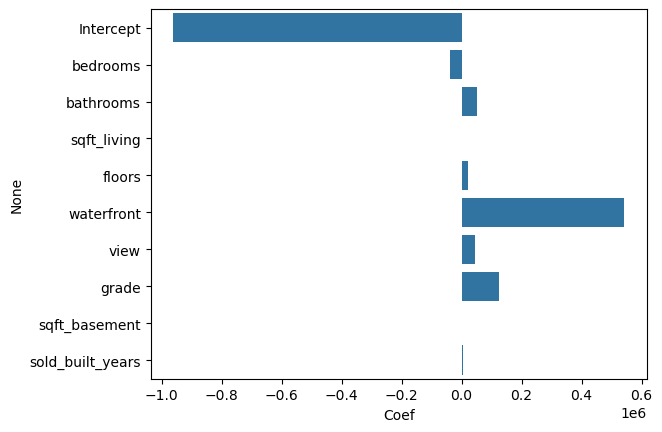

In [23]:
sns.barplot(x=coefs_df.Coef, y=coefs_df.index)
plt.show()

#### 회귀계수 출력 및 시각화 함수 작성

In [24]:
def reg_coeff_plot(model, ftr_names):
    coef = pd.Series(data=np.round(model.coef_, 5), index=ftr_names)
    coef_s = coef.sort_values(ascending=False)
    sns.barplot(x=coef_s, y=coef_s.index)
    plt.show()
    print(f'회귀계수들\n{coef}')

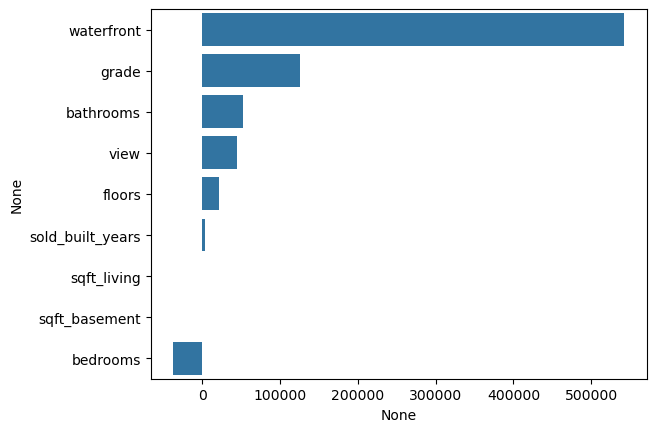

회귀계수들
bedrooms            -37252.41453
bathrooms            51935.13379
sqft_living            165.90552
floors               21476.06392
waterfront          542343.91343
view                 44471.73249
grade               125186.55797
sqft_basement            8.47468
sold_built_years      3823.75564
dtype: float64


In [25]:
reg_coeff_plot(lr, ftr_names=X.columns)

#### 실제값과 예측값과의 차이

In [49]:
def get_residual(y_test, y_pred,top_n=10,sort=False):
    df = pd.DataFrame(y_test.values, columns=['Real_y'])
    df['Pred_y'] = np.round(y_pred)
    df['abs(Residual)'] = df['Real_y'] - df['Pred_y']
    if sort:
        df = df.sort_values(by='abs(Residual)', ascending=False)
    
    return df[:top_n]

In [50]:
get_residual(y_test, y_pred,sort=True, top_n=30)

,Real_y,Pred_y,abs(Residual)
67,7062500.0,3105758.0,3956742.0
2824,3650000.0,1508862.0,2141138.0
1252,3635000.0,1654146.0,1980854.0
2743,3200000.0,1520077.0,1679923.0
1166,3000000.0,1342465.0,1657535.0
1443,3640900.0,2091479.0,1549421.0
2952,3000000.0,1574528.0,1425472.0
1611,2750000.0,1325002.0,1424998.0
1191,3000000.0,1590414.0,1409586.0
736,2900000.0,1522909.0,1377091.0


### 교차 검증으로 MSE와 RMSE 측정

cross_val_score() 이용

In [52]:
from sklearn.model_selection import cross_val_score

In [54]:
lr = LinearRegression()
neg_mses = cross_val_score(lr,X, y, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(neg_mses*(-1))
avg_rmse = np.mean(rmse)

print(f'Negative MSE: {neg_mses}')
print(f'{np.round(rmse,2)}, Average RMSE:{avg_rmse:.2f}')

Negative MSE: [-5.24325442e+10 -4.93197221e+10 -4.22322999e+10 -4.40322894e+10
 -5.03632995e+10]
[228981.54 222080.44 205504.99 209838.72 224417.69], Average RMSE:218164.68


-------

### 주택가격 price를 로그변환하여 회귀분석 진행 

#### 주택가격 price 분포

<Figure size 600x500 with 0 Axes>

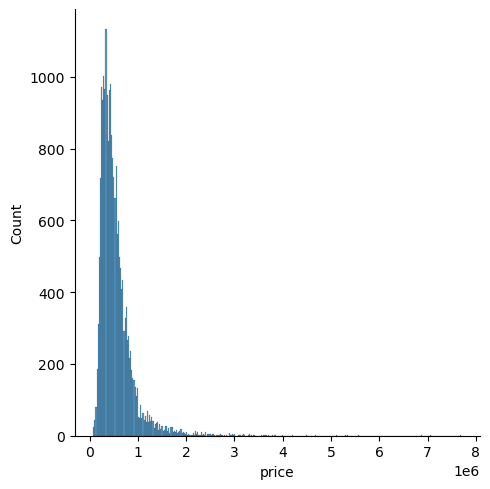

In [57]:
plt.figure(figsize=(6,5))
sns.displot(kind='hist', x=y)
plt.show()

#### 로그변환된 price 분포

In [58]:
from sklearn.metrics import mean_squared_log_error

#### 모델 성능 평가 RMSLE(Root Mean Square Log Error)를 위한 함수 작성

- 오류 값의 로그에 대한 RMSE

#### RMSE 함수 작성

In [ ]:
from sk

In [69]:
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

#### 회귀모델 성능 평가를 위한 함수 작성

- MSE, RMSE, RMSLE, MAE, R2 계산

In [70]:
def print_eval_regr_scores(y, pred):
    rmse_val = rmse(y, pred)
    rmsle = mean_squared_log_error(y, pred)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)

    print(f'RMSE:{rmse_val:.3f}, MAE:{mae:.3f}, RMSLE:rmse{rmsle:.3f}, R2:{r2:.3f}')

#### 로그변환된 주택가격 회귀모델 학습 및 평가

In [71]:
X = house_df.drop('price', axis=1)
log_y = np.log1p(house_df.price)

X_train, X_test, y_train, y_test = train_test_split(X, log_y ,test_size = 0.2, random_state=2020158011)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print_eval_regr_scores(y_test_exp, y_pred_exp)

RMSE:227372.830, MAE:133669.366, RMSLE:rmse0.096, R2:0.609


#### 실제값과 예측값과의 차이

In [75]:
get_residual(y_test_exp, y_pred_exp)

,Real_y,Pred_y,abs(Residual)
0,549950.0,645976.0,-96026.0
1,775000.0,867069.0,-92069.0
2,252000.0,337266.0,-85266.0
3,849000.0,860513.0,-11513.0
4,925000.0,896246.0,28754.0
5,487585.0,348072.0,139513.0
6,740000.0,650361.0,89639.0
7,485000.0,440415.0,44585.0
8,295000.0,377807.0,-82807.0
9,458000.0,293777.0,164223.0


#### 회귀계수 

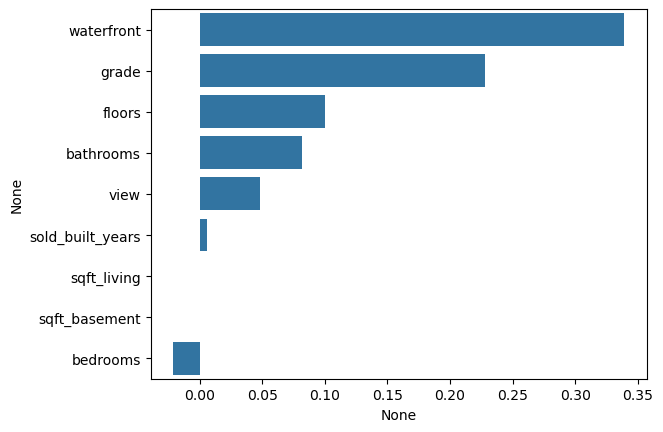

회귀계수들
bedrooms           -0.02092
bathrooms           0.08188
sqft_living         0.00015
floors              0.10014
waterfront          0.33904
view                0.04867
grade               0.22808
sqft_basement       0.00007
sold_built_years    0.00576
dtype: float64


In [76]:
reg_coeff_plot(lr, X.columns)

#### 회귀모델 학습 및 평가 수치 반환 함수 작성

In [80]:
def print_eval_regr_scores(y, pred,is_log=False):
    rmse_val = rmse(y, pred)
    # rmsle = mean_squared_log_error(y, pred)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    if is_log:
        rmsle = mean_squared_log_error(y, pred)
        print(f'RMSE:{rmse_val:.3f}, MAE:{mae:.3f}, RMSLE:rmse{rmsle:.3f}, R2:{r2:.3f}')
    else:
        print(f'RMSE:{rmse_val:.3f}, MAE:{mae:.3f}, R2:{r2:.3f}')

def get_model_predict(model, X_train, X_test, y_train, y_test, is_log=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if is_log:
        y_test = np.expm1(y_test)
        y_pred = np.expm1(y_pred)
        text = 'log변환'
    else:
        text = ' '
    print(f'{model} {text}')
    print_eval_regr_scores(y_test, y_pred, is_log=is_log)

        

In [82]:
X = house_df.drop('price', axis=1)
y = house_df.price

X_train, X_test, y_train, y_test = train_test_split(X, log_y ,test_size = 0.2)
model = LinearRegression()
get_model_predict(model, X_train, X_test, y_train, y_test)

log_y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, log_y ,test_size = 0.2)
get_model_predict(model, X_train, X_test, y_train, y_test, is_log = True)

LinearRegression()  
RMSE:0.313, MAE:0.249, R2:0.652
LinearRegression() log변환
RMSE:210668.526, MAE:133376.348, RMSLE:rmse0.099, R2:0.644


------

In [83]:
house_df.waterfront.value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [86]:
house_df[house_df['waterfront']==1].describe().style.background_gradient(cmap='twilight')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,sold_built_years
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,1661876.024540,3.300613,2.677914,3173.687117,1.641104,1.000000,3.766871,8.773006,700.644172,52.110429
std,1120371.731212,1.078035,1.092456,1606.025093,0.554191,0.000000,0.561859,1.761385,792.919972,27.902167
min,285000.000000,1.000000,0.750000,440.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000
25%,760000.000000,3.000000,2.000000,2060.000000,1.000000,1.000000,4.000000,8.000000,0.000000,28.000000
50%,1400000.000000,3.000000,2.500000,2850.000000,2.000000,1.000000,4.000000,9.000000,500.000000,54.000000
75%,2215000.000000,4.000000,3.250000,3905.000000,2.000000,1.000000,4.000000,10.000000,1245.000000,73.500000
max,7062500.000000,6.000000,6.750000,10040.000000,3.000000,1.000000,4.000000,12.000000,4820.000000,111.000000


In [87]:
house_df[house_df['waterfront']==0].describe().style.background_gradient(cmap='twilight')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,sold_built_years
count,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000
mean,531563.599814,3.371375,2.110478,2071.587972,1.493193,0.000000,0.207459,7.648392,288.400000,43.251002
std,341599.589656,0.928856,0.765648,906.257233,0.539740,0.000000,0.702686,1.165861,437.413797,29.376950
min,75000.000000,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
25%,320000.000000,3.000000,1.500000,1420.000000,1.000000,0.000000,0.000000,7.000000,0.000000,18.000000
50%,450000.000000,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,7.000000,0.000000,39.000000
75%,639897.000000,4.000000,2.500000,2540.000000,2.000000,0.000000,0.000000,8.000000,560.000000,63.000000
max,7700000.000000,33.000000,8.000000,13540.000000,3.500000,0.000000,4.000000,13.000000,4130.000000,115.000000


### 범주형 변수 원한인코딩 후 회귀분석 진행

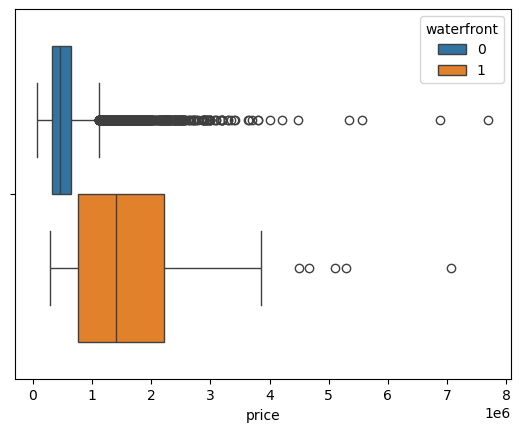

In [88]:
sns.boxplot(data=house_df, x='price', hue='waterfront')
plt.show()

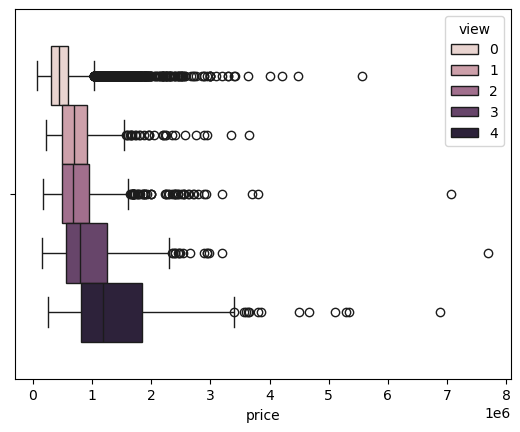

In [96]:
sns.boxplot(data=house_df, x='price', hue='view')
plt.show()

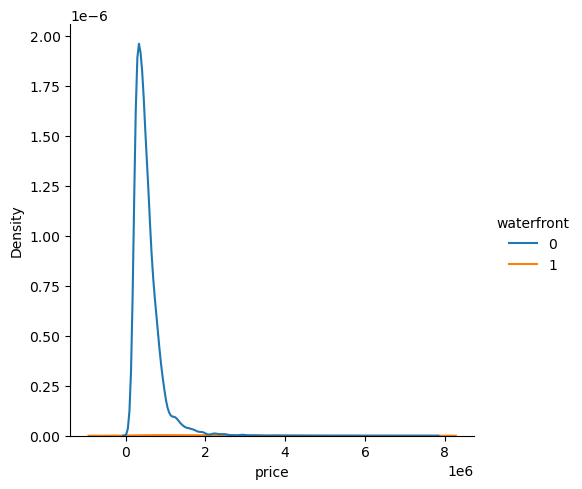

In [94]:
sns.displot(data=house_df, x='price', hue='waterfront', kind='kde')
plt.show()

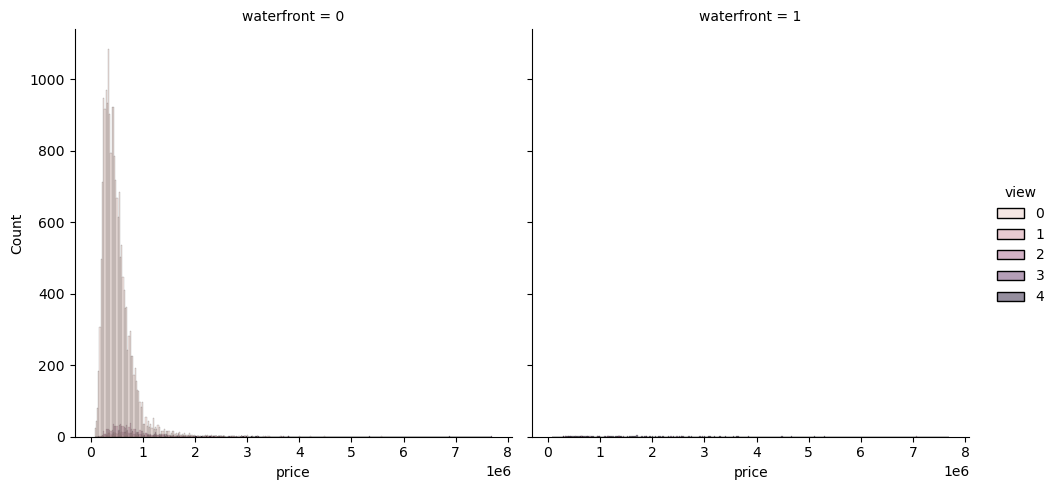

In [95]:
sns.displot(data=house_df, x='price', col='waterfront', hue='view')
plt.show()

#### 범주형 변수 원핫인코딩

- waterfront, view

In [100]:
X_ohe = pd.get_dummies(X,columns=['waterfront','view'], dtype='int',drop_first=True)
X_ohe.head()

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_basement,sold_built_years,waterfront_1,view_1,view_2,view_3,view_4
0,3,1.00,1180,1.0,7,0,59,0,0,0,0,0
1,3,2.25,2570,2.0,7,400,63,0,0,0,0,0
2,2,1.00,770,1.0,6,0,82,0,0,0,0,0
3,4,3.00,1960,1.0,7,910,49,0,0,0,0,0
4,3,2.00,1680,1.0,8,0,28,0,0,0,0,0


#### 로그변환, 원핫인코딩한 데이터로 회귀모델 예측

In [101]:
log_y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X_ohe, log_y ,test_size = 0.2, random_state=2020158011)
model = LinearRegression()
get_model_predict(model, X_train, X_test, y_train, y_test, is_log = True)

LinearRegression() log변환
RMSE:227387.958, MAE:133377.741, RMSLE:rmse0.095, R2:0.609


#### 회귀계수 

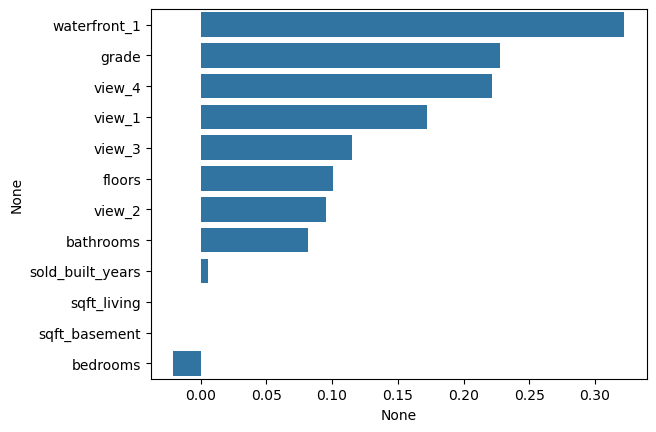

회귀계수들
bedrooms           -0.02075
bathrooms           0.08183
sqft_living         0.00015
floors              0.10070
grade               0.22759
sqft_basement       0.00007
sold_built_years    0.00574
waterfront_1        0.32226
view_1              0.17206
view_2              0.09537
view_3              0.11514
view_4              0.22163
dtype: float64


In [102]:
reg_coeff_plot(model, X_ohe.columns)

LinearRegression() log변환
RMSE:200031.144, MAE:132227.797, RMSLE:rmse0.099, R2:0.715


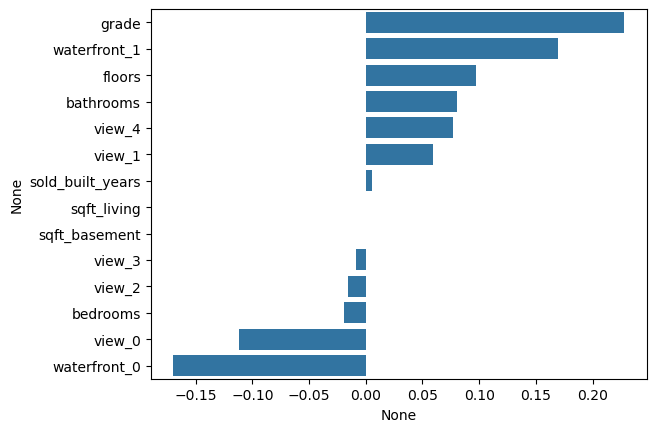

회귀계수들
bedrooms           -0.01946
bathrooms           0.08070
sqft_living         0.00014
floors              0.09727
grade               0.22793
sqft_basement       0.00007
sold_built_years    0.00573
waterfront_0       -0.16977
waterfront_1        0.16977
view_0             -0.11202
view_1              0.05937
view_2             -0.01611
view_3             -0.00850
view_4              0.07726
dtype: float64


In [107]:
X_ohe2 = pd.get_dummies(X, columns=['waterfront','view'], dtype='int')
log_y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X_ohe2, log_y ,test_size = 0.2)
model2 = LinearRegression()
get_model_predict(model2, X_train, X_test, y_train, y_test,is_log=True)
reg_coeff_plot(model2, X_ohe2.columns)

-------------------------------------------------